# **Introduction**

**The National Grid ESO serves as the electricity system operator for Great Britain. They have compiled data on electricity demand in Great Britain since 2009. The information is refreshed twice every hour, resulting in 48 entries per day.**

https://www.kaggle.com/datasets/albertovidalrod/electricity-consumption-uk-20092022?select=historic_demand_2009_2023.csv

### **1. To what extent does the electricity demand in the UK and Wales align with electricity production?**
### **2. During which month is electricity demand at its peak?**






### **Libraries Import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import calendar

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

### **Connection with google Drive**

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/My Drive/Colab/final_assessment"

/content/drive/My Drive/Colab/final_assessment


### **Read the csv dataset using pandas**

In [4]:
complete_df = pd.read_csv('historic_demand_2009_2023.csv')

In [5]:
complete_df.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,is_holiday
0,0,2009-01-01,1,37910,38704,33939,54,1403,0,0,...,33,2002,0,0,-161,0,0,NaN,NaN,1
1,1,2009-01-01,2,38047,38964,34072,53,1403,0,0,...,157,2002,0,0,-160,0,0,NaN,NaN,1
2,2,2009-01-01,3,37380,38651,33615,53,1403,0,0,...,511,2002,0,0,-160,0,0,NaN,NaN,1
3,3,2009-01-01,4,36426,37775,32526,50,1403,0,0,...,589,1772,0,0,-160,0,0,NaN,NaN,1
4,4,2009-01-01,5,35687,37298,31877,50,1403,0,0,...,851,1753,0,0,-160,0,0,NaN,NaN,1


# PRE PROCESSING and Exploratory Data Analysis (EDA)

In [6]:
complete_df.describe()

,Unnamed: 0,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,is_holiday
count,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,258094.000000,82798.000000,82798.000000,258094.000000
mean,129046.500000,24.500039,31575.755260,32974.734554,28725.320527,1215.558382,4274.643432,832.923272,7962.292273,7.200028,313.342542,915.315970,23.047715,530.093729,-113.143006,-31.229994,152.395321,265.578830,-9.122974,0.022875
std,74505.464526,13.853707,7830.087522,7745.095207,7098.279430,923.195640,1936.405307,1644.010436,5540.003761,40.676525,538.979634,1086.819435,321.167065,519.858089,225.336791,253.277536,395.876534,553.756114,405.024832,0.149506
min,0.000000,1.000000,13367.000000,0.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1022.000000,-1455.000000,-1028.000000,0.000000
25%,64523.250000,12.250000,25305.000000,26941.000000,23019.000000,528.000000,2085.000000,0.000000,1861.000000,0.000000,8.000000,209.000000,0.000000,0.000000,-258.000000,-148.000000,0.000000,0.000000,0.000000,0.000000
50%,129046.500000,24.000000,30963.000000,32177.000000,28158.000000,976.000000,4260.000000,0.000000,9602.000000,0.000000,11.000000,1207.000000,0.000000,757.000000,-129.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,193569.750000,36.000000,37342.000000,38490.000000,33997.000000,1650.000000,6465.000000,795.000000,13080.000000,0.000000,403.000000,1897.000000,0.000000,994.000000,39.000000,0.000000,0.000000,693.000000,0.000000,0.000000
max,258093.000000,50.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9830.000000,14285.000000,893.000000,2019.000000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1401.000000,1002.000000,1.000000


### **Percentage of the missing dataset**

In [7]:
complete_df.isna().sum()/len(complete_df)*100

Unnamed: 0                    0.00000
settlement_date               0.00000
settlement_period             0.00000
nd                            0.00000
tsd                           0.00000
england_wales_demand          0.00000
embedded_wind_generation      0.00000
embedded_wind_capacity        0.00000
embedded_solar_generation     0.00000
embedded_solar_capacity       0.00000
non_bm_stor                   0.00000
pump_storage_pumping          0.00000
ifa_flow                      0.00000
ifa2_flow                     0.00000
britned_flow                  0.00000
moyle_flow                    0.00000
east_west_flow                0.00000
nemo_flow                     0.00000
nsl_flow                     67.91944
eleclink_flow                67.91944
is_holiday                    0.00000
dtype: float64

**Deleted the two columns nsl_flow and eleclink_flow because around 68% dataset is missing**

**The 30-minute settlement period in energy markets records consumption, generation, and data at intervals, ensuring values are within 48**

In [8]:
complete_df.drop(columns=["nsl_flow", "eleclink_flow"], axis=1, inplace=True)
complete_df.drop(index=complete_df[complete_df["settlement_period"] > 48].index, inplace=True)
complete_df.reset_index(drop=True, inplace=True)

In [9]:
complete_df.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,0,2009-01-01,1,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,1,2009-01-01,2,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2,2009-01-01,3,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,3,2009-01-01,4,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,4,2009-01-01,5,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


**Utilizing histograms to identify the frequency of zero occurrences in specific columns**

<Axes: xlabel='nd', ylabel='Count'>

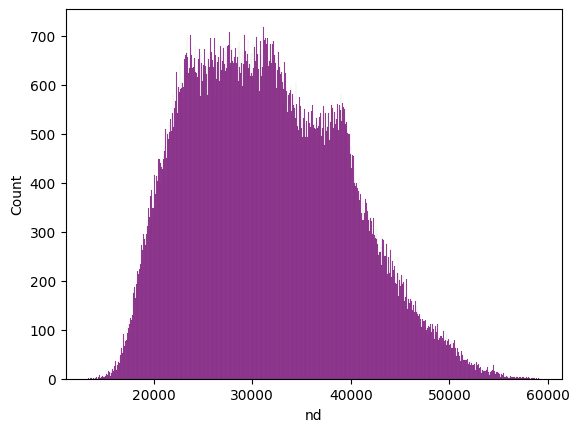

In [10]:
sns.histplot(data=complete_df, x="nd", bins=800, color="purple")

<Axes: xlabel='tsd', ylabel='Count'>

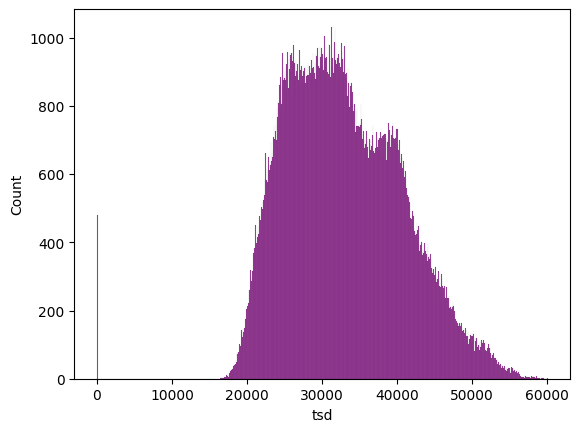

In [ ]:
sns.histplot(data=complete_df, x="tsd", bins=800, color="purple")

<Axes: xlabel='england_wales_demand', ylabel='Count'>

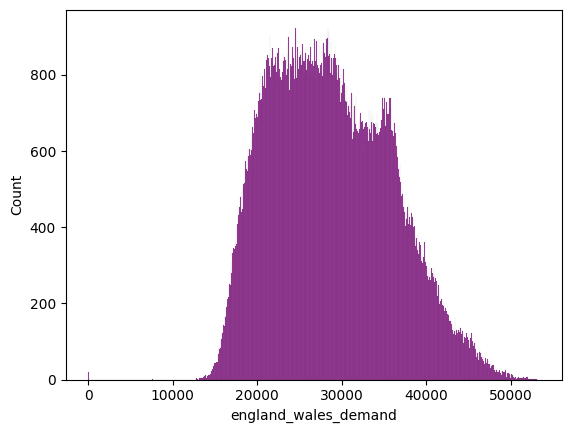

In [ ]:
sns.histplot(data=complete_df, x="england_wales_demand", bins=800, color="purple")

In [11]:
# Find unique dates where either 'nd' or 'england_wales_demand' or 'tsd' is zero
remove_rows = complete_df.loc[(complete_df['nd'] == 0) | (complete_df['england_wales_demand'] == 0) | (complete_df['tsd'] == 0), 'settlement_date'].unique()

# Delete rows with these dates from the original DataFrame
filtered_df = complete_df[~complete_df['settlement_date'].isin(remove_rows)]

**Converted string datetime into date time object and extract month and year**

In [12]:
filtered_df['date_for'] = pd.to_datetime(filtered_df['settlement_date'], format='%Y-%m-%d')
filtered_df['month'] = filtered_df['date_for'].dt.month
filtered_df['year'] = filtered_df['date_for'].dt.year
filtered_df['month_name'] = filtered_df['month'].apply(lambda x: calendar.month_abbr[x])

<ipython-input-12-889f0d1900ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date_for'] = pd.to_datetime(filtered_df['settlement_date'], format='%Y-%m-%d')
<ipython-input-12-889f0d1900ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['date_for'].dt.month
<ipython-input-12-889f0d1900ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
filtered_df.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,date_for,month,year,month_name
0,0,2009-01-01,1,37910,38704,33939,54,1403,0,0,...,0,0,-161,0,0,1,2009-01-01,1,2009,Jan
1,1,2009-01-01,2,38047,38964,34072,53,1403,0,0,...,0,0,-160,0,0,1,2009-01-01,1,2009,Jan
2,2,2009-01-01,3,37380,38651,33615,53,1403,0,0,...,0,0,-160,0,0,1,2009-01-01,1,2009,Jan
3,3,2009-01-01,4,36426,37775,32526,50,1403,0,0,...,0,0,-160,0,0,1,2009-01-01,1,2009,Jan
4,4,2009-01-01,5,35687,37298,31877,50,1403,0,0,...,0,0,-160,0,0,1,2009-01-01,1,2009,Jan


**Combine month and year with "-" to show like Feb-2021 or Feb-2022**

In [13]:
filtered_df['month_year'] = filtered_df.apply(lambda row: f"{row['year']}-{row['month_name']}", axis=1)

<ipython-input-13-c7426fa4a72f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_year'] = filtered_df.apply(lambda row: f"{row['year']}-{row['month_name']}", axis=1)


## Correlation

Text(0.5, 1.0, 'Correlation Matrix')

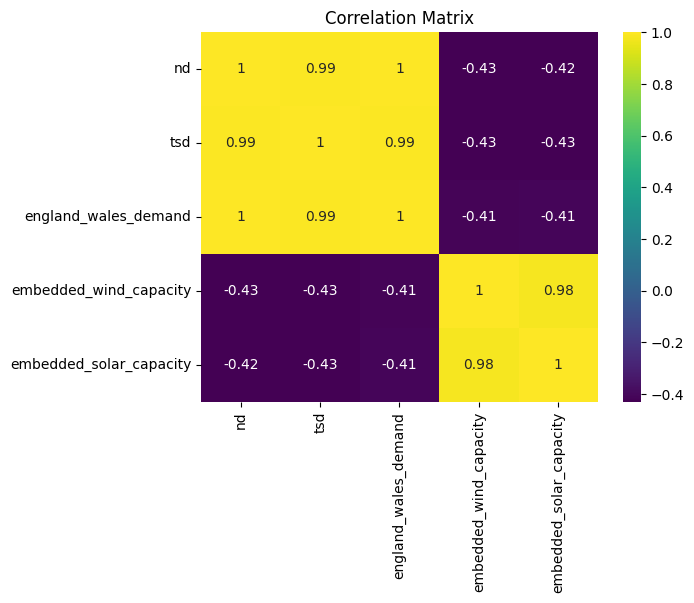

In [ ]:
chunk_df = filtered_df[['nd', 'tsd', 'england_wales_demand', 'embedded_wind_capacity', 'embedded_solar_capacity']]
ax = sns.heatmap(chunk_df.corr(method="pearson"), annot=True, cmap='viridis')
ax.set_title("Correlation Matrix")

The National Demand (nd) and Transmission System Demand (tsd) exhibit a strong correlation with the overall demand for England.

### Scatter plot to visualize the correlation between england_wales_demand and National Demand

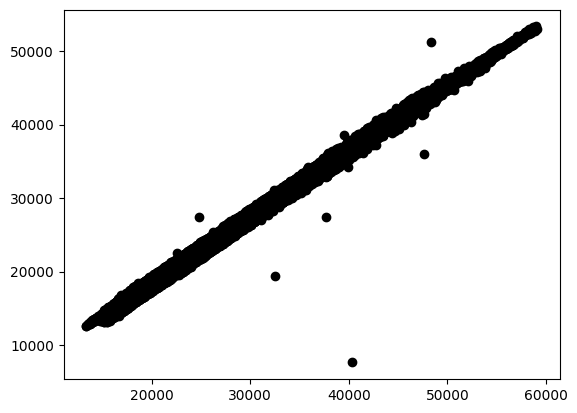

In [ ]:
plt.scatter(filtered_df.nd,filtered_df.england_wales_demand, color='black')

### Scatter plot to visualize between england_wales_demand and Transmission System Demand

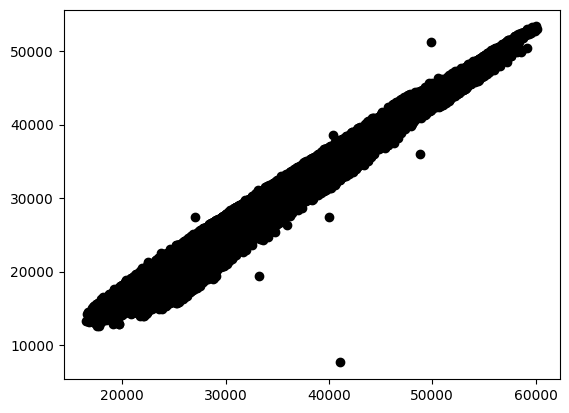

In [ ]:
plt.scatter(filtered_df.tsd,filtered_df.england_wales_demand, color='black')

# **Analysis**

## 1. Overall Comparison

In [ ]:
# Calculated the average of specific columns on a yearly basis
overall_df = filtered_df.groupby([filtered_df['year']]).agg({'nd': 'mean', 'tsd': 'mean', 'england_wales_demand': 'mean', 'embedded_solar_capacity': 'mean',
                                                             'embedded_wind_capacity': 'mean', 'moyle_flow': 'mean', 'nemo_flow': 'mean'})

In [ ]:
# As data is incomplete for year 2023, so I skip this year for better visualization
overall_df = overall_df[overall_df.index <= 2022]

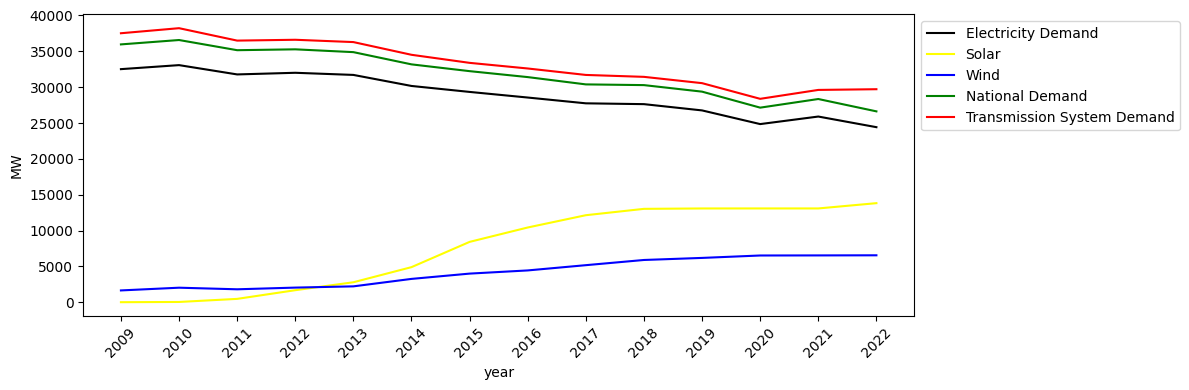

In [ ]:
fig = plt.subplots(figsize=(12, 4))
sns.lineplot(data=overall_df, x='year', y='england_wales_demand', label='Electricity Demand', color='black')
sns.lineplot(data=overall_df, x='year', y='embedded_solar_capacity', label='Solar', color='yellow')
sns.lineplot(data=overall_df, x='year', y='embedded_wind_capacity', label='Wind', color='blue')
sns.lineplot(data=overall_df, x='year', y='nd', label='National Demand', color='green')
sns.lineplot(data=overall_df, x='year', y='tsd', label='Transmission System Demand', color='red')
plt.xticks(rotation=45)
plt.xticks(overall_df.index)
plt.ylabel('MW')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("yearly_comparison.png")

This comparison illustrates a decline in electricity demand each year, concurrent with a rise in sources such as solar and wind.

## **Interactive Visualization**

### **England Wales Demand month wise for each year**

The following three graph showin interavtive visualization where it is decreasing from Febuaury and began to rise again from November

In [ ]:
fig = px.line(filtered_df, x= 'date_for', y='england_wales_demand', color='month_name', title='Electricity Demand', animation_frame='month_name')
fig.update_layout(xaxis_title='Date', yaxis_title='Electricity Demand')

Output hidden; open in https://colab.research.google.com to view.

### **National Demand month wise for each year**

In [ ]:
fig = px.line(filtered_df, x= 'date_for', y='nd', color='month_name', title='National Demand', animation_frame='month_name')
fig.update_layout(xaxis_title='Date', yaxis_title='Electricity Demand')

Output hidden; open in https://colab.research.google.com to view.

### **Transmission System Demand month wise for each year**

In [ ]:
fig = px.line(filtered_df, x= 'date_for', y='tsd', color='month_name', title='Transmission System Demand', animation_frame='month_name')
fig.update_layout(xaxis_title='Date', yaxis_title='Electricity Demand')

Output hidden; open in https://colab.research.google.com to view.

## **Method for Comparing Errors in Algorithms**

In [ ]:
def error_graph(reg_error, xg_boost_err, rf_error):
  models = ['Linear Regression', 'XG Boost', 'Random Forest']
  accuracies = [reg_error, xg_boost_err, rf_error]

  plt.bar(models, accuracies, color=['red', 'blue', 'green'])

  # Set labels and title
  # plt.xlabel('Models')
  plt.ylabel('Accuracy')
  plt.title('Model Accuracies')

  # Display the plot
  plt.show()

### **Method for Linear Regression**

In [ ]:
def calculate_regression(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  regr = LinearRegression()
  # fitting the training data
  regr.fit(X_train, y_train)
  print('Coefficients:', regr.coef_)
  print('Intercept:', regr.intercept_)
  y_prediction = regr.predict(X_test)

  # print("Mean absolute error: %.2f" % np.mean(np.absolute(y_prediction-y_test)))
  # print("Residual sum of squares (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
  print("Linear Regression R2-score: %.2f" % r2_score(y_prediction,y_test))
  return r2_score(y_prediction,y_test)

## **Method for XG Boost**

In [ ]:
def calculate_xg_boost(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  xgb_reg = xgb.XGBRegressor()
  xgb_reg.fit(X_train, y_train)
  y_pred = xgb_reg.predict(X_test)

  print("XG Boost R2-score: %.2f" % r2_score(y_test,y_pred))
  return r2_score(y_test,y_pred)

## **Method for Random Forests**

In [ ]:
def calculate_random_forest(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  regressor = RandomForestRegressor(n_estimators=100)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  print("Random Forest R2-score: %.2f" % r2_score(y_test,y_pred))
  return r2_score(y_test,y_pred)

**Method to plot the graph for the given year**

In [ ]:
def plot_demand(data, y_variable, colors, selected_month=None):

  if selected_month is not None:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    months = [selected_month]
  else:
    fig, axes = plt.subplots(6, 2, figsize=(10, 20))
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  for i, month in enumerate(months):
    month_mask = data['month_name'] == month
    month_df = data[month_mask]

    grouped_df = month_df.groupby(['date_for', 'year']).agg({
        'nd': 'mean',
        'tsd': 'mean',
        'england_wales_demand': 'mean',
        'embedded_solar_capacity': 'mean',
        'embedded_wind_capacity': 'mean',
        'moyle_flow': 'mean',
        'nemo_flow': 'mean'
    }).reset_index()

    if selected_month is not None:
      current_axes = ax
    else:
      current_axes = axes[i // 2, i % 2]

    # Plot lines for each variable
    for j, variable in enumerate(y_variable):
      sns.lineplot(data=grouped_df, x='year', y=variable, ax=current_axes, color=colors[j], errorbar=None)

    # Customize the plot
    current_axes.set_xlabel('Year')
    current_axes.set_ylabel('MW')
    current_axes.set_xticks(grouped_df['year'].unique())
    current_axes.set_xticklabels(grouped_df['year'].unique(), rotation=90)
    current_axes.set_title(month)

  if selected_month is not None:
    plt.legend(labels=y_variable, loc='upper left', bbox_to_anchor=(1, 1))
    X = grouped_df[['nd', 'tsd', 'embedded_solar_capacity', 'embedded_wind_capacity']]
    y = grouped_df['england_wales_demand']
    reg_err = calculate_regression(X, y)
    xg_boost_err = calculate_xg_boost(X, y)
    rf_error = calculate_random_forest(X, y)
    return [reg_err, xg_boost_err, rf_error]
  else:
    plt.legend(labels=y_variable, loc='upper right', bbox_to_anchor=(0, -0.5), ncol=1)
    plt.tight_layout()
    X = grouped_df[['nd', 'tsd', 'embedded_solar_capacity', 'embedded_wind_capacity']]
    y = grouped_df['england_wales_demand']
    reg_err = calculate_regression(X, y)
    xg_boost_err = calculate_xg_boost(X, y)
    rf_error = calculate_random_forest(X, y)
    return [reg_err, xg_boost_err, rf_error]
  plt.tight_layout()
  plt.show()
    # plt.savefig("months_per_year_comparison.png")

**Method to select the month from the user to display graph**

In [28]:
def month_selection():
  months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

  while True:
    for idx, month in enumerate(months, start=1):
      print(f"{idx}. {month}")

    month_input = input("Enter the number to select a month: ")

    try:
      month_number = int(month_input)
      if 1 <= month_number <= 12:
          selected_month = months[month_number - 1]
          return month_input
          break
      else:
          print("Invalid input. Please enter a number between 1 and 12.")
    except ValueError:
      print("Invalid input. Please enter a valid number.")

## Month per Year Comparison

In [43]:
y_variables = ['england_wales_demand', 'embedded_solar_capacity', 'embedded_wind_capacity', 'nd', 'tsd']
line_colors = ['black', 'yellow', 'blue', 'green', 'red']

1. January
2. February
3. March
4. April
5. May
6. June
7. July
8. August
9. September
10. October
11. November
12. December
Enter the number to select a month: 5
Coefficients: [ 0.8206737   0.09990123  0.02716019 -0.03732324]
Intercept: -587.3661732684595
Linear Regression R2-score: 1.00
XG Boost R2-score: 1.00
Random Forest R2-score: 1.00


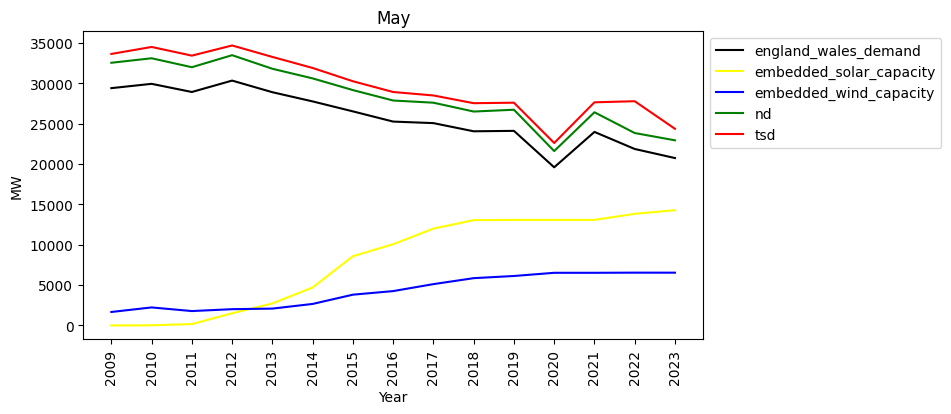

In [ ]:
month_input = month_selection()
months_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
selected_month = months_dict[int(month_input)]
reg_error, xg_boost_err, rf_error = plot_demand(filtered_df, y_variables, line_colors, selected_month)

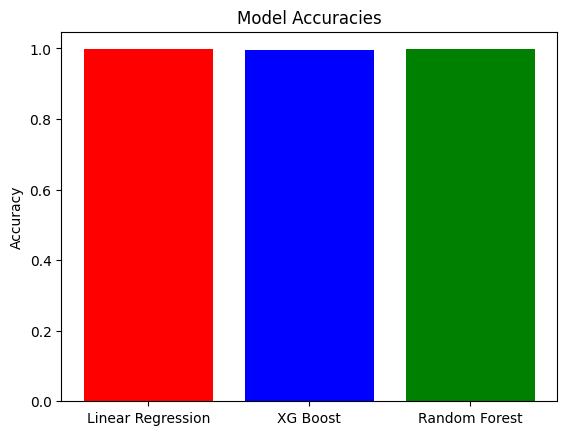

In [ ]:
error_graph(reg_error, xg_boost_err, rf_error)

I have used above three models and they are giving almost the same error which clearly showing data is correlated

## Monthly Comparison

**Showing less electricity demand in summer as comapre to winter and following line grapgh demonstrate that**

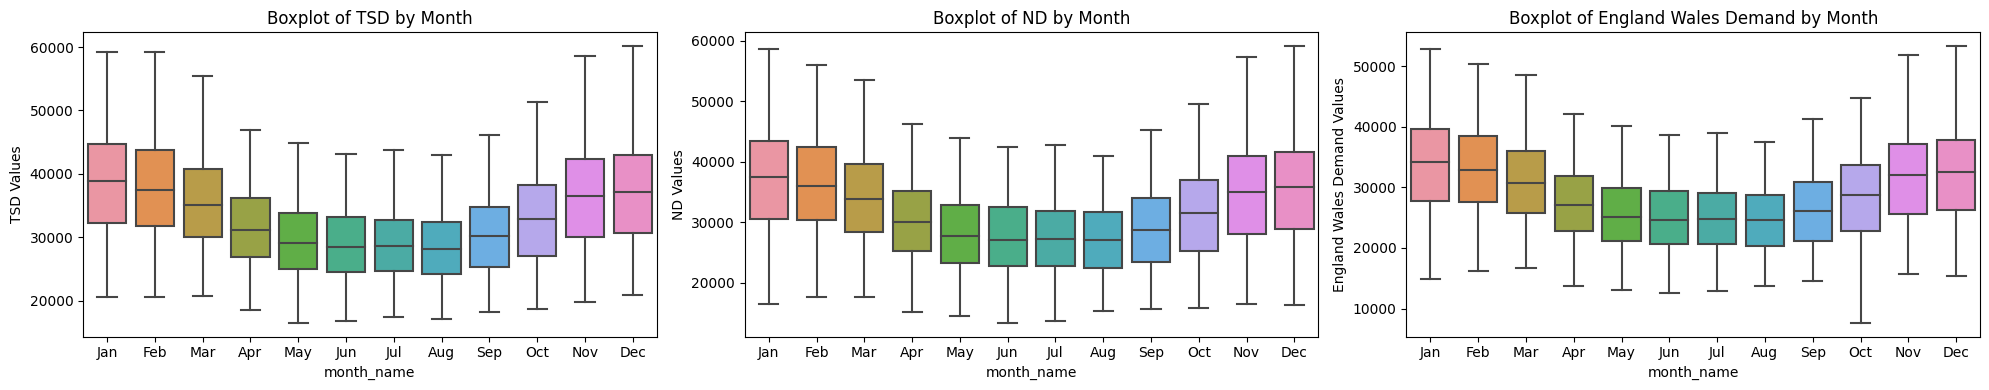

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.boxplot(x="month_name", y="tsd", data=filtered_df, ax=axes[0])
axes[0].set_title('Boxplot of TSD by Month')
axes[0].set_ylabel('TSD Values')

sns.boxplot(x="month_name", y="nd", data=filtered_df, ax=axes[1])
axes[1].set_title('Boxplot of ND by Month')
axes[1].set_ylabel('ND Values')

sns.boxplot(x="month_name", y="england_wales_demand", data=filtered_df, ax=axes[2])
axes[2].set_title('Boxplot of England Wales Demand by Month')
axes[2].set_ylabel('England Wales Demand Values')

plt.tight_layout()
plt.savefig("monthly_comparison_boxplot.png")

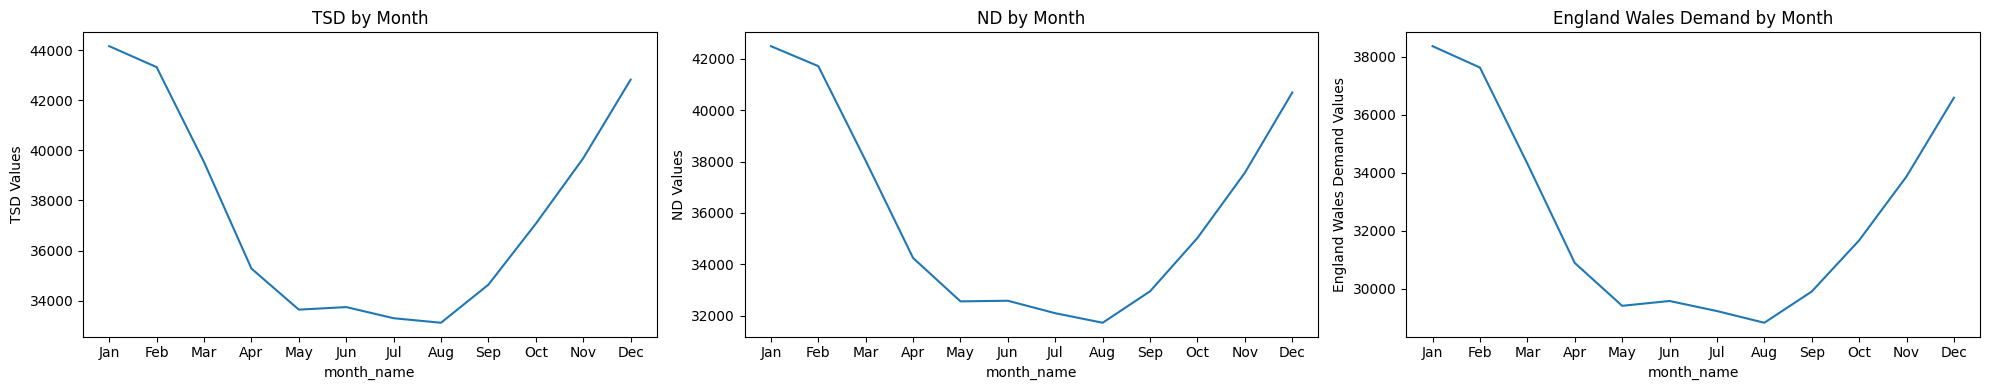

In [ ]:
year_mask_2009 = filtered_df['year'] == 2009
df_2009 = filtered_df[year_mask_2009]

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.lineplot(x="month_name", y="tsd", data=df_2009, ax=axes[0], errorbar=None)
axes[0].set_title('TSD by Month')
axes[0].set_ylabel('TSD Values')

sns.lineplot(x="month_name", y="nd", data=df_2009, ax=axes[1], errorbar=None)
axes[1].set_title('ND by Month')
axes[1].set_ylabel('ND Values')

sns.lineplot(x="month_name", y="england_wales_demand", data=df_2009, ax=axes[2], errorbar=None)
axes[2].set_title('England Wales Demand by Month')
axes[2].set_ylabel('England Wales Demand Values')

plt.tight_layout()
plt.savefig("monthly_comparison_line.png")

We use a box plot to illustrate the trends of electricity demand, nd and tsd. Comparing them, we notice a decline starting in January, gradually increasing until September, and then rising sharply until January. This suggests less electricity usage from April to September. A line plot for a single year exemplifies and confirms this trend.

## Seasonal Comparison

This comparison will show the variation of demand over the four seasons
*   summer months = June, Jul and Aug
*   winter month = Dec, Jan, Feb
*   spring month = Mar, Apr and May
*   autumn month = Sept, Oct and Nov

In [ ]:
filtered_df['season'] = filtered_df['month_name'].map({
    'Jun': 'summer',
    'Jul': 'summer',
    'Aug': 'summer',
    'Dec': 'winter',
    'Jan': 'winter',
    'Feb': 'winter',
    'Mar': 'spring',
    'Apr': 'spring',
    'May': 'spring',
    'Sep': 'autumn',
    'Oct': 'autumn',
    'Nov': 'autumn'
})

<ipython-input-43-6f7c9485e6af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_df.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,moyle_flow,east_west_flow,nemo_flow,is_holiday,date_for,month,year,month_name,month_year,season
0,0,2009-01-01,1,37910,38704,33939,54,1403,0,0,...,-161,0,0,1,2009-01-01,1,2009,Jan,2009-Jan,winter
1,1,2009-01-01,2,38047,38964,34072,53,1403,0,0,...,-160,0,0,1,2009-01-01,1,2009,Jan,2009-Jan,winter
2,2,2009-01-01,3,37380,38651,33615,53,1403,0,0,...,-160,0,0,1,2009-01-01,1,2009,Jan,2009-Jan,winter
3,3,2009-01-01,4,36426,37775,32526,50,1403,0,0,...,-160,0,0,1,2009-01-01,1,2009,Jan,2009-Jan,winter
4,4,2009-01-01,5,35687,37298,31877,50,1403,0,0,...,-160,0,0,1,2009-01-01,1,2009,Jan,2009-Jan,winter


**Method to plot the seasos wise graph**

In [ ]:
def plot_seasonal(data, y_variable, selected_year):

    fig, ax = plt.subplots(figsize=(8, 4))

    year_mask = data['year'] == selected_year
    year_df = data[year_mask]

    year_df = year_df.groupby(['month_name', 'season']).agg({
      y_variable: 'mean'
    }).reset_index()


    # Define the custom order for months
    month_order = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

    # Convert 'month_name' to a categorical type with the custom order
    year_df['month_name'] = pd.Categorical(year_df['month_name'], categories=month_order, ordered=True)

    # Plot lines for each season
    sns.lineplot(data=year_df, x='month_name', y=y_variable, hue='season', ax=ax, errorbar=None, marker='o')

    # Customize the plot
    ax.set_xlabel('Month')
    ax.set_ylabel('MW')
    ax.set_title(selected_year)
    ax.legend(labels=year_df['season'].unique(), loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()

**Method to select year between 2009 to 2023**

In [29]:
def year_selection():

  while True:
    print("Select year between 2009 an 2023 for seasonal graph")

    year_input = int(input("Enter the number to select a month: "))

    try:
      if 2009 <= year_input <= 2023:
          return year_input
          break
      else:
          print("Invalid input. Please enter a year between 2009 and 2023.")
    except ValueError:
      print("Invalid input. Please enter inside a valid yaer range.")

Select year between 2009 an 2023 for seasonal graph
Enter the number to select a month: 2014


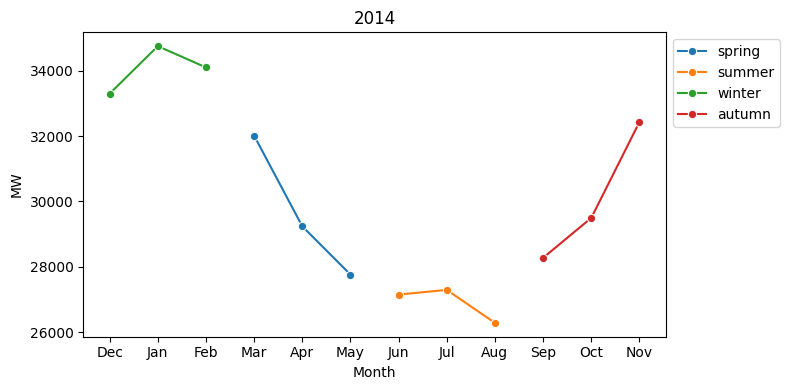

In [ ]:
selected_year = year_selection()
plot_seasonal(filtered_df, 'england_wales_demand', selected_year)

The United Kingdom experiences higher electricity demand during the spring season, attributed to moderate temperatures that necessitate minimal heating usage. In contrast, the summer months witness the least electricity demand due to favorable temperatures and the absence of heating requirements. The remaining seasons demonstrate intermediate electricity usage, reflecting varied heating needs influenced by changing weather conditions.

## Peak and Off Peak Hours Comparison
I have selected four time to analyze


1.   12:00 am to 8:00 am
2.   8:00 am to 2:00 pm
3.   2:00 pm to 8:00 pm
4.   8:00 pm to 12:00 am

**Extract data according to above four time slots**

In [40]:
first_set = filtered_df[filtered_df.settlement_period <= 16]
second_set = filtered_df[(filtered_df.settlement_period > 16) & (filtered_df.settlement_period <= 28)]
third_set = filtered_df[(filtered_df.settlement_period > 28) & (filtered_df.settlement_period <= 40)]
fourth_set = filtered_df[(filtered_df.settlement_period > 40) & (filtered_df.settlement_period <= 48)]

**Give month name abbreviation to see the demand**

In [14]:
filtered_df['peak_offpeak'] = np.select(
    [
        filtered_df['settlement_period'] <= 16,
        (filtered_df['settlement_period'] > 16) & (filtered_df['settlement_period'] <= 28),
        (filtered_df['settlement_period'] > 28) & (filtered_df['settlement_period'] <= 40),
        (filtered_df['settlement_period'] > 40) & (filtered_df['settlement_period'] <= 48)
    ],
    ['12 am to 8 am', '8 am to 2 pm', '2 pm to 8 pm', '8 pm to 12 am'],  # Corrected label
    default='Other'
)

<ipython-input-14-5884df9c128e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['peak_offpeak'] = np.select(


In [34]:
def plot_peak_offpeak(data, selected_month, year):
    plt.figure(figsize=(12, 5))

    month_mask_first = (data['month_name'] == selected_month) & (data['year'] == year)
    month_df = data[month_mask_first]

    grouped_df = month_df.groupby(['date_for', 'peak_offpeak']).agg({
        'england_wales_demand': 'mean',
    }).reset_index()

    # Plot lines for each variable
    sns.lineplot(data=grouped_df, x='date_for', y='england_wales_demand', hue='peak_offpeak', err_style=None)

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('MW')
    date_ticks = grouped_df['date_for'].dt.date.unique()
    plt.xticks(date_ticks, rotation=90)
    graph_title  = selected_month + ' '+ str(year)
    plt.title(graph_title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

1. January
2. February
3. March
4. April
5. May
6. June
7. July
8. August
9. September
10. October
11. November
12. December
Enter the number to select a month: 2
Select year between 2009 an 2023 for seasonal graph
Enter the number to select a month: 2014


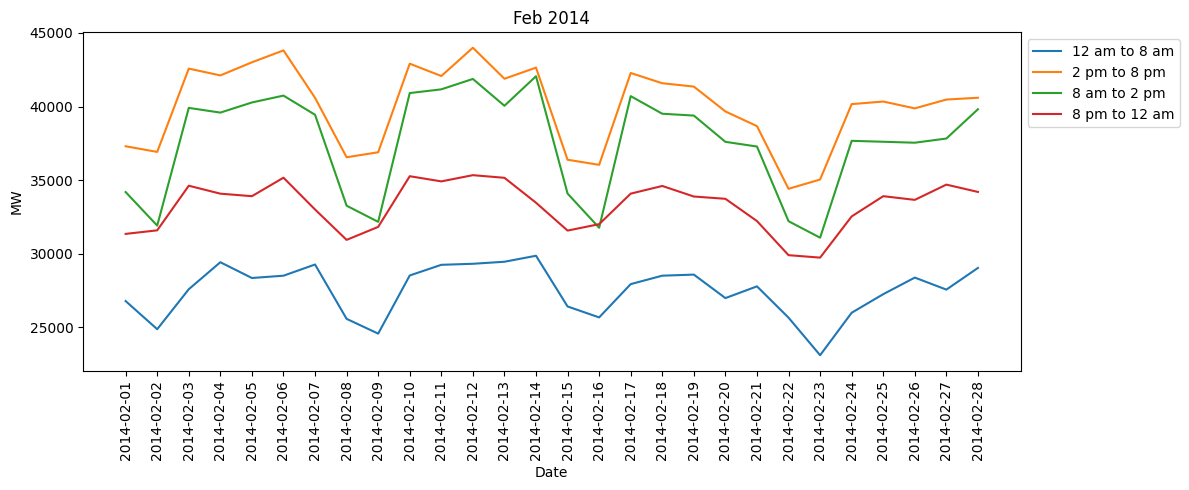

In [35]:
month_input = month_selection()
months_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
selected_month = months_dict[int(month_input)]
selected_year = year_selection()
plot_peak_offpeak(filtered_df, selected_month, selected_year)

It indicates that electricity consumption is notably higher from 2 pm to 8 pm, suggesting it as the busiest period, whereas the peak time for electricity usage occurs from 8 am to 2 pm. The least electricity consumption is observed during the period when most people are asleep, ranging from 12 am to 8 am.

## Import/ Export to following countries

1.   Moyle Flow -> Connection between Northern Ireland and Scotland
2.   East West Flow -> Connection between Wales and Ireland
3.   Nemo Flow -> Connection between UK and Belgium

In [85]:
filtered_df['moyle_flow_category'] = np.select(
    [
        filtered_df['moyle_flow'] < 0,
        filtered_df['moyle_flow'] > 0,
        filtered_df['moyle_flow'] == 0
    ],
    ['export', 'import', 'no import/export'],
    default='Other'
)

filtered_df['east_west_flow_category'] = np.select(
    [
        filtered_df['east_west_flow'] < 0,
        filtered_df['east_west_flow'] > 0,
        filtered_df['east_west_flow'] == 0
    ],
    ['export', 'import', 'no import/export'],
    default='Other'
)

filtered_df['nemo_flow_category'] = np.select(
    [
        filtered_df['nemo_flow'] < 0,
        filtered_df['nemo_flow'] > 0,
        filtered_df['nemo_flow'] == 0
    ],
    ['export', 'import', 'no import/export'],
    default='Other'
)

<ipython-input-85-c30d6dbafc23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['moyle_flow_category'] = np.select(
<ipython-input-85-c30d6dbafc23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['east_west_flow_category'] = np.select(
<ipython-input-85-c30d6dbafc23>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

**Method to visualize the import export for each year**

In [29]:
def import_export(df, column_type):
  plt.figure(figsize=(6, 4))
  column_name = column_type + "_category"
  export_data = df[df[column_name] == 'export']
  import_data = df[df[column_name] == 'import']
  merged_data = pd.concat([export_data, import_data])
  grouped_df = merged_data.groupby(['month_name', column_name, 'year']).agg({
          column_type: 'mean'
      }).reset_index()
  grouped_df = grouped_df[grouped_df.year <= 2022]
  sns.lineplot(data=grouped_df, x='year', y=column_type, hue=column_name, errorbar=None, marker='o')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.title(column_type)
  plt.xticks(grouped_df['year'].unique(), grouped_df['year'].unique().astype(int), rotation=45)

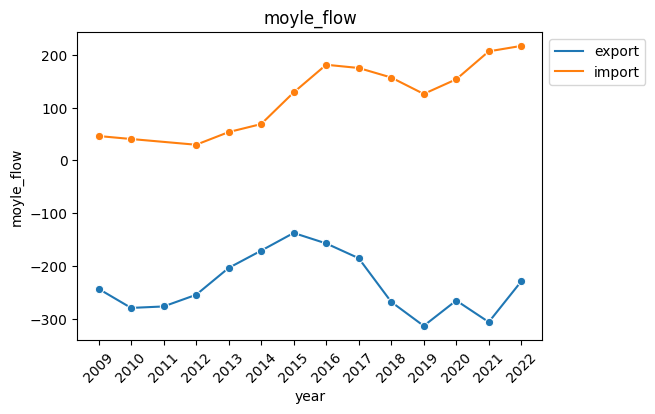

In [30]:
import_export(filtered_df, "moyle_flow")

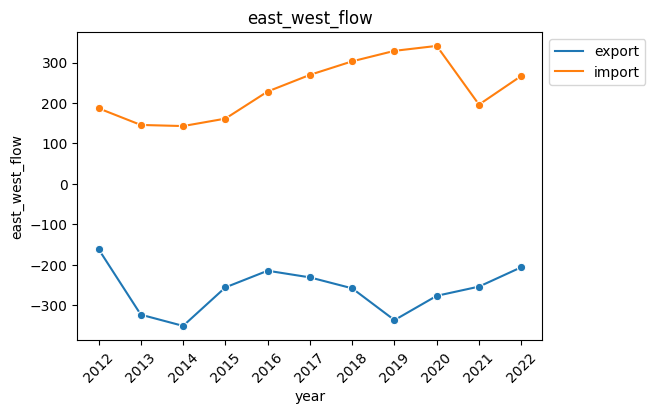

In [31]:
import_export(filtered_df, "east_west_flow")

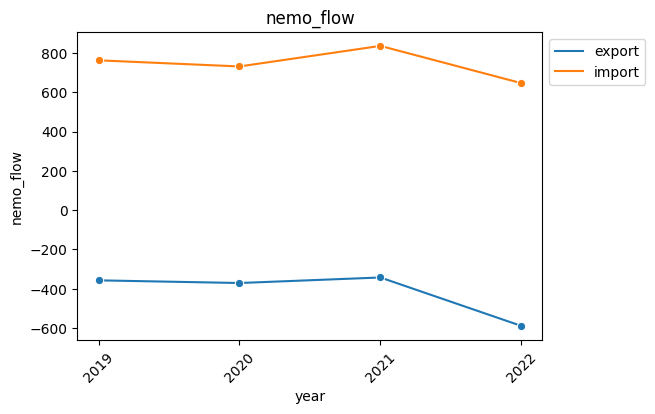

In [37]:
import_export(filtered_df, "nemo_flow")